In [26]:
import pandas as pd
from sklearn.mixture import GMM
from matplotlib import pyplot as plt
from matplotlib import mlab
import numpy as np

%matplotlib inline

In [4]:
observations = pd.read_csv('observations.csv')

In [22]:
heights = observations['0'].values

In [23]:
model = GMM(n_components=2, n_iter=100)

In [24]:
model.fit(heights)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=0.01)

(array([  2.,   3.,   1.,   6.,   7.,  13.,   7.,  19.,  25.,  13.,  31.,
         25.,  32.,  25.,  19.,  27.,  24.,  27.,  41.,  43.,  28.,  48.,
         38.,  45.,  33.,  41.,  36.,  35.,  27.,  19.,  18.,  13.,   9.,
          8.,   4.,   3.,   2.,   0.,   3.]),
 array([ 145.53893748,  146.75841652,  147.97789557,  149.19737461,
         150.41685366,  151.6363327 ,  152.85581175,  154.07529079,
         155.29476984,  156.51424888,  157.73372793,  158.95320697,
         160.17268602,  161.39216506,  162.6116441 ,  163.83112315,
         165.05060219,  166.27008124,  167.48956028,  168.70903933,
         169.92851837,  171.14799742,  172.36747646,  173.58695551,
         174.80643455,  176.0259136 ,  177.24539264,  178.46487169,
         179.68435073,  180.90382978,  182.12330882,  183.34278786,
         184.56226691,  185.78174595,  187.001225  ,  188.22070404,
         189.44018309,  190.65966213,  191.87914118,  193.09862022]),
 <a list of 39 Patch objects>)

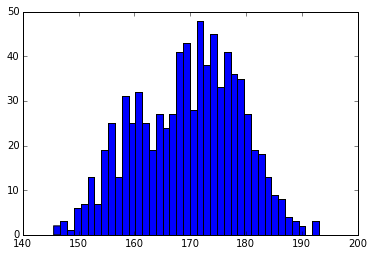

In [25]:
bins = np.linspace(min(heights), max(heights), 40)
plt.hist(heights, bins = bins)

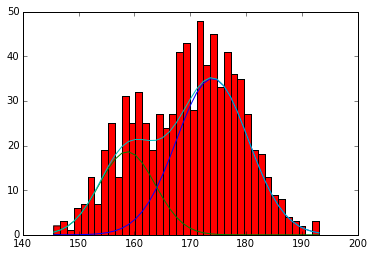

In [32]:
mixed_model = np.array([])

for i in range(model.n_components):
    pdf = mlab.normpdf(bins, model.means_[i][0], np.sqrt(model.covars_[i][0])) * len(observations) * model.weights_[i]
    plt.plot(bins,pdf)
    if mixed_model.any():
        mixed_model += pdf
    else:
        mixed_model = pdf

plt.hist(heights, bins = bins)
plt.plot(bins,mixed_model)

In [28]:
model.weights_

array([ 0.70781609,  0.29218391])